# Multiple Linear Regression 

In [2]:
from ucimlrepo import list_available_datasets
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from sklearn.feature_selection import f_regression




import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold

from statsmodels.tools.tools import add_constant


from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [3]:
dataset_name = "Appliances Energy Prediction"
dataset = fetch_ucirepo(name=dataset_name)

In [4]:
# Convert features and target to DataFrame
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1)

In [5]:
# Step 1: Fix dashes
df['date'] = df['date'].str.replace('–', '-', regex=False)

# Step 2: Insert a 'T' between date and time
df['date'] = df['date'].str.replace(r'(\d{4}-\d{2}-\d{2})(\d{2}:\d{2}:\d{2})', r'\1T\2', regex=True)

# Step 3: Convert to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%S')

In [6]:
df.head()

date  lights     T1       RH_1    T2       RH_2     T3  \
0 2016-01-11 17:00:00      30  19.89  47.596667  19.2  44.790000  19.79   
1 2016-01-11 17:10:00      30  19.89  46.693333  19.2  44.722500  19.79   
2 2016-01-11 17:20:00      30  19.89  46.300000  19.2  44.626667  19.79   
3 2016-01-11 17:30:00      40  19.89  46.066667  19.2  44.590000  19.79   
4 2016-01-11 17:40:00      40  19.89  46.333333  19.2  44.530000  19.79   

        RH_3         T4       RH_4  ...   RH_9  T_out  Press_mm_hg  RH_out  \
0  44.730000  19.000000  45.566667  ...  45.53   6.60        733.5    92.0   
1  44.790000  19.000000  45.992500  ...  45.56   6.48        733.6    92.0   
2  44.933333  18.926667  45.890000  ...  45.50   6.37        733.7    92.0   
3  45.000000  18.890000  45.723333  ...  45.40   6.25        733.8    92.0   
4  45.000000  18.890000  45.530000  ...  45.40   6.13        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  Appliances  
0   7.000000   63.000000        5.3  13.275433  13.275433          60  
1   6.666667   59.166667        5.2  18.606195  18.606195          60  
2   6.333333   55.333333        5.1  28.642668  28.642668          50  
3   6.000000   51.500000        5.0  45.410390  45.410390          50  
4   5.666667   47.666667        4.9  10.084097  10.084097          60  

[5 rows x 29 columns]

In [7]:
# Drop columns 
df = df.drop(columns=['lights'])

In [8]:
df.head()

date     T1       RH_1    T2       RH_2     T3       RH_3  \
0 2016-01-11 17:00:00  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1 2016-01-11 17:10:00  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2 2016-01-11 17:20:00  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3 2016-01-11 17:30:00  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4 2016-01-11 17:40:00  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4         T5  ...   RH_9  T_out  Press_mm_hg  RH_out  \
0  19.000000  45.566667  17.166667  ...  45.53   6.60        733.5    92.0   
1  19.000000  45.992500  17.166667  ...  45.56   6.48        733.6    92.0   
2  18.926667  45.890000  17.166667  ...  45.50   6.37        733.7    92.0   
3  18.890000  45.723333  17.166667  ...  45.40   6.25        733.8    92.0   
4  18.890000  45.530000  17.200000  ...  45.40   6.13        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  Appliances  
0   7.000000   63.000000        5.3  13.275433  13.275433          60  
1   6.666667   59.166667        5.2  18.606195  18.606195          60  
2   6.333333   55.333333        5.1  28.642668  28.642668          50  
3   6.000000   51.500000        5.0  45.410390  45.410390          50  
4   5.666667   47.666667        4.9  10.084097  10.084097          60  

[5 rows x 28 columns]

In [9]:
# Extracting Features from the datetime column
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek
df['day_name'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()

In [10]:
df.head()

date     T1       RH_1    T2       RH_2     T3       RH_3  \
0 2016-01-11 17:00:00  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1 2016-01-11 17:10:00  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2 2016-01-11 17:20:00  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3 2016-01-11 17:30:00  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4 2016-01-11 17:40:00  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4         T5  ...  Tdewpoint        rv1        rv2  \
0  19.000000  45.566667  17.166667  ...        5.3  13.275433  13.275433   
1  19.000000  45.992500  17.166667  ...        5.2  18.606195  18.606195   
2  18.926667  45.890000  17.166667  ...        5.1  28.642668  28.642668   
3  18.890000  45.723333  17.166667  ...        5.0  45.410390  45.410390   
4  18.890000  45.530000  17.200000  ...        4.9  10.084097  10.084097   

   Appliances  hour  day  day_of_week  day_name  month  month_name  
0          60    17   11            0    Monday      1     January  
1          60    17   11            0    Monday      1     January  
2          50    17   11            0    Monday      1     January  
3          50    17   11            0    Monday      1     January  
4          60    17   11            0    Monday      1     January  

[5 rows x 34 columns]

In [11]:
# Define the face of the day 
def face_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column
df['face_of_day'] = df['hour'].apply(face_of_day)

In [12]:
df.head()

date     T1       RH_1    T2       RH_2     T3       RH_3  \
0 2016-01-11 17:00:00  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1 2016-01-11 17:10:00  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2 2016-01-11 17:20:00  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3 2016-01-11 17:30:00  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4 2016-01-11 17:40:00  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4         T5  ...        rv1        rv2  Appliances  \
0  19.000000  45.566667  17.166667  ...  13.275433  13.275433          60   
1  19.000000  45.992500  17.166667  ...  18.606195  18.606195          60   
2  18.926667  45.890000  17.166667  ...  28.642668  28.642668          50   
3  18.890000  45.723333  17.166667  ...  45.410390  45.410390          50   
4  18.890000  45.530000  17.200000  ...  10.084097  10.084097          60   

   hour  day  day_of_week  day_name  month  month_name  face_of_day  
0    17   11            0    Monday      1     January    Afternoon  
1    17   11            0    Monday      1     January    Afternoon  
2    17   11            0    Monday      1     January    Afternoon  
3    17   11            0    Monday      1     January    Afternoon  
4    17   11            0    Monday      1     January    Afternoon  

[5 rows x 35 columns]

In [14]:
# Show first 5 rows with selected important columns
df[['date', 'T1', 'RH_1', 'rv1', 'Appliances', 'hour', 'day_name']].head()


date     T1       RH_1        rv1  Appliances  hour day_name
0 2016-01-11 17:00:00  19.89  47.596667  13.275433          60    17   Monday
1 2016-01-11 17:10:00  19.89  46.693333  18.606195          60    17   Monday
2 2016-01-11 17:20:00  19.89  46.300000  28.642668          50    17   Monday
3 2016-01-11 17:30:00  19.89  46.066667  45.410390          50    17   Monday
4 2016-01-11 17:40:00  19.89  46.333333  10.084097          60    17   Monday

In [15]:
# Filter rows from a specific time block (e.g., Morning: 6am to 12pm)
df[(df['hour'] >= 6) & (df['hour'] < 12)].sample(5)


date     T1       RH_1         T2       RH_2     T3  \
7579  2016-03-04 08:10:00  20.60  37.760000  18.700000  39.096667  20.60   
1112  2016-01-19 10:20:00  18.60  40.500000  17.133333  41.030000  19.10   
669   2016-01-16 08:30:00  21.50  40.700000  20.633333  40.326667  20.79   
11772 2016-04-02 11:00:00  20.89  39.466667  19.033333  42.290000  21.79   
8592  2016-03-11 09:00:00  20.10  37.840000  16.856667  41.926667  20.39   

            RH_3         T4   RH_4         T5  ...        rv1        rv2  \
7579   37.777143  19.290000  36.59  18.290000  ...  36.694195  36.694195   
1112   39.730000  17.890000  38.09  16.700000  ...   0.492896   0.492896   
669    42.000000  21.356667  42.50  19.463333  ...  33.570416  33.570416   
11772  37.290000  19.790000  38.29  19.290000  ...  17.967495  17.967495   
8592   37.430000  19.700000  34.80  17.890000  ...  26.522719  26.522719   

       Appliances  hour  day  day_of_week  day_name  month  month_name  \
7579           50     8    4            4    Friday      3       March   
1112           50    10   19            1   Tuesday      1     January   
669            70     8   16            5  Saturday      1     January   
11772          30    11    2            5  Saturday      4       April   
8592           50     9   11            4    Friday      3       March   

       face_of_day  
7579       Morning  
1112       Morning  
669        Morning  
11772      Morning  
8592       Morning  

[5 rows x 35 columns]

In [16]:
# Show a random sample of 5 rows
df.sample(5)


date         T1       RH_1         T2       RH_2  \
454   2016-01-14 20:40:00  22.700000  43.066667  21.700000  40.600000   
10532 2016-03-24 20:20:00  22.000000  40.526667  20.426667  41.590000   
8846  2016-03-13 03:20:00  20.790000  35.500000  17.290000  39.700000   
13189 2016-04-12 07:10:00  21.790000  42.363333  19.200000  45.966667   
18971 2016-05-22 10:50:00  24.412727  53.740455  23.285586  53.564925   

              T3       RH_3         T4       RH_4         T5  ...        rv1  \
454    22.000000  43.400000  18.963333  46.663333  18.400000  ...   2.709521   
10532  22.200000  38.200000  20.390000  36.930000  20.566667  ...  15.466198   
8846   20.200000  36.760000  19.600000  34.590000  18.290000  ...  40.874592   
13189  23.000000  39.500000  21.700000  40.290000  20.790000  ...  30.983557   
18971  27.449545  47.222727  23.722523  49.478739  22.624775  ...  25.074508   

             rv2  Appliances  hour  day  day_of_week  day_name  month  \
454     2.709521         100    20   14            3  Thursday      1   
10532  15.466198         100    20   24            3  Thursday      3   
8846   40.874592          50     3   13            6    Sunday      3   
13189  30.983557          70     7   12            1   Tuesday      4   
18971  25.074508         320    10   22            6    Sunday      5   

       month_name  face_of_day  
454       January      Evening  
10532       March      Evening  
8846        March        Night  
13189       April      Morning  
18971         May      Morning  

[5 rows x 35 columns]

In [106]:
# Separate numerical and categorical, dependent variable
numerical_features = df.select_dtypes(include='number')
categorical = df.select_dtypes(include='object')
dependent_variable = df['Appliances']

In [107]:
numerical_features = numerical_features.drop(columns=['day', 'day_of_week', 'month'])

# Step 2: EDA

#### Check Normal Distribution of Univariate Analysis 

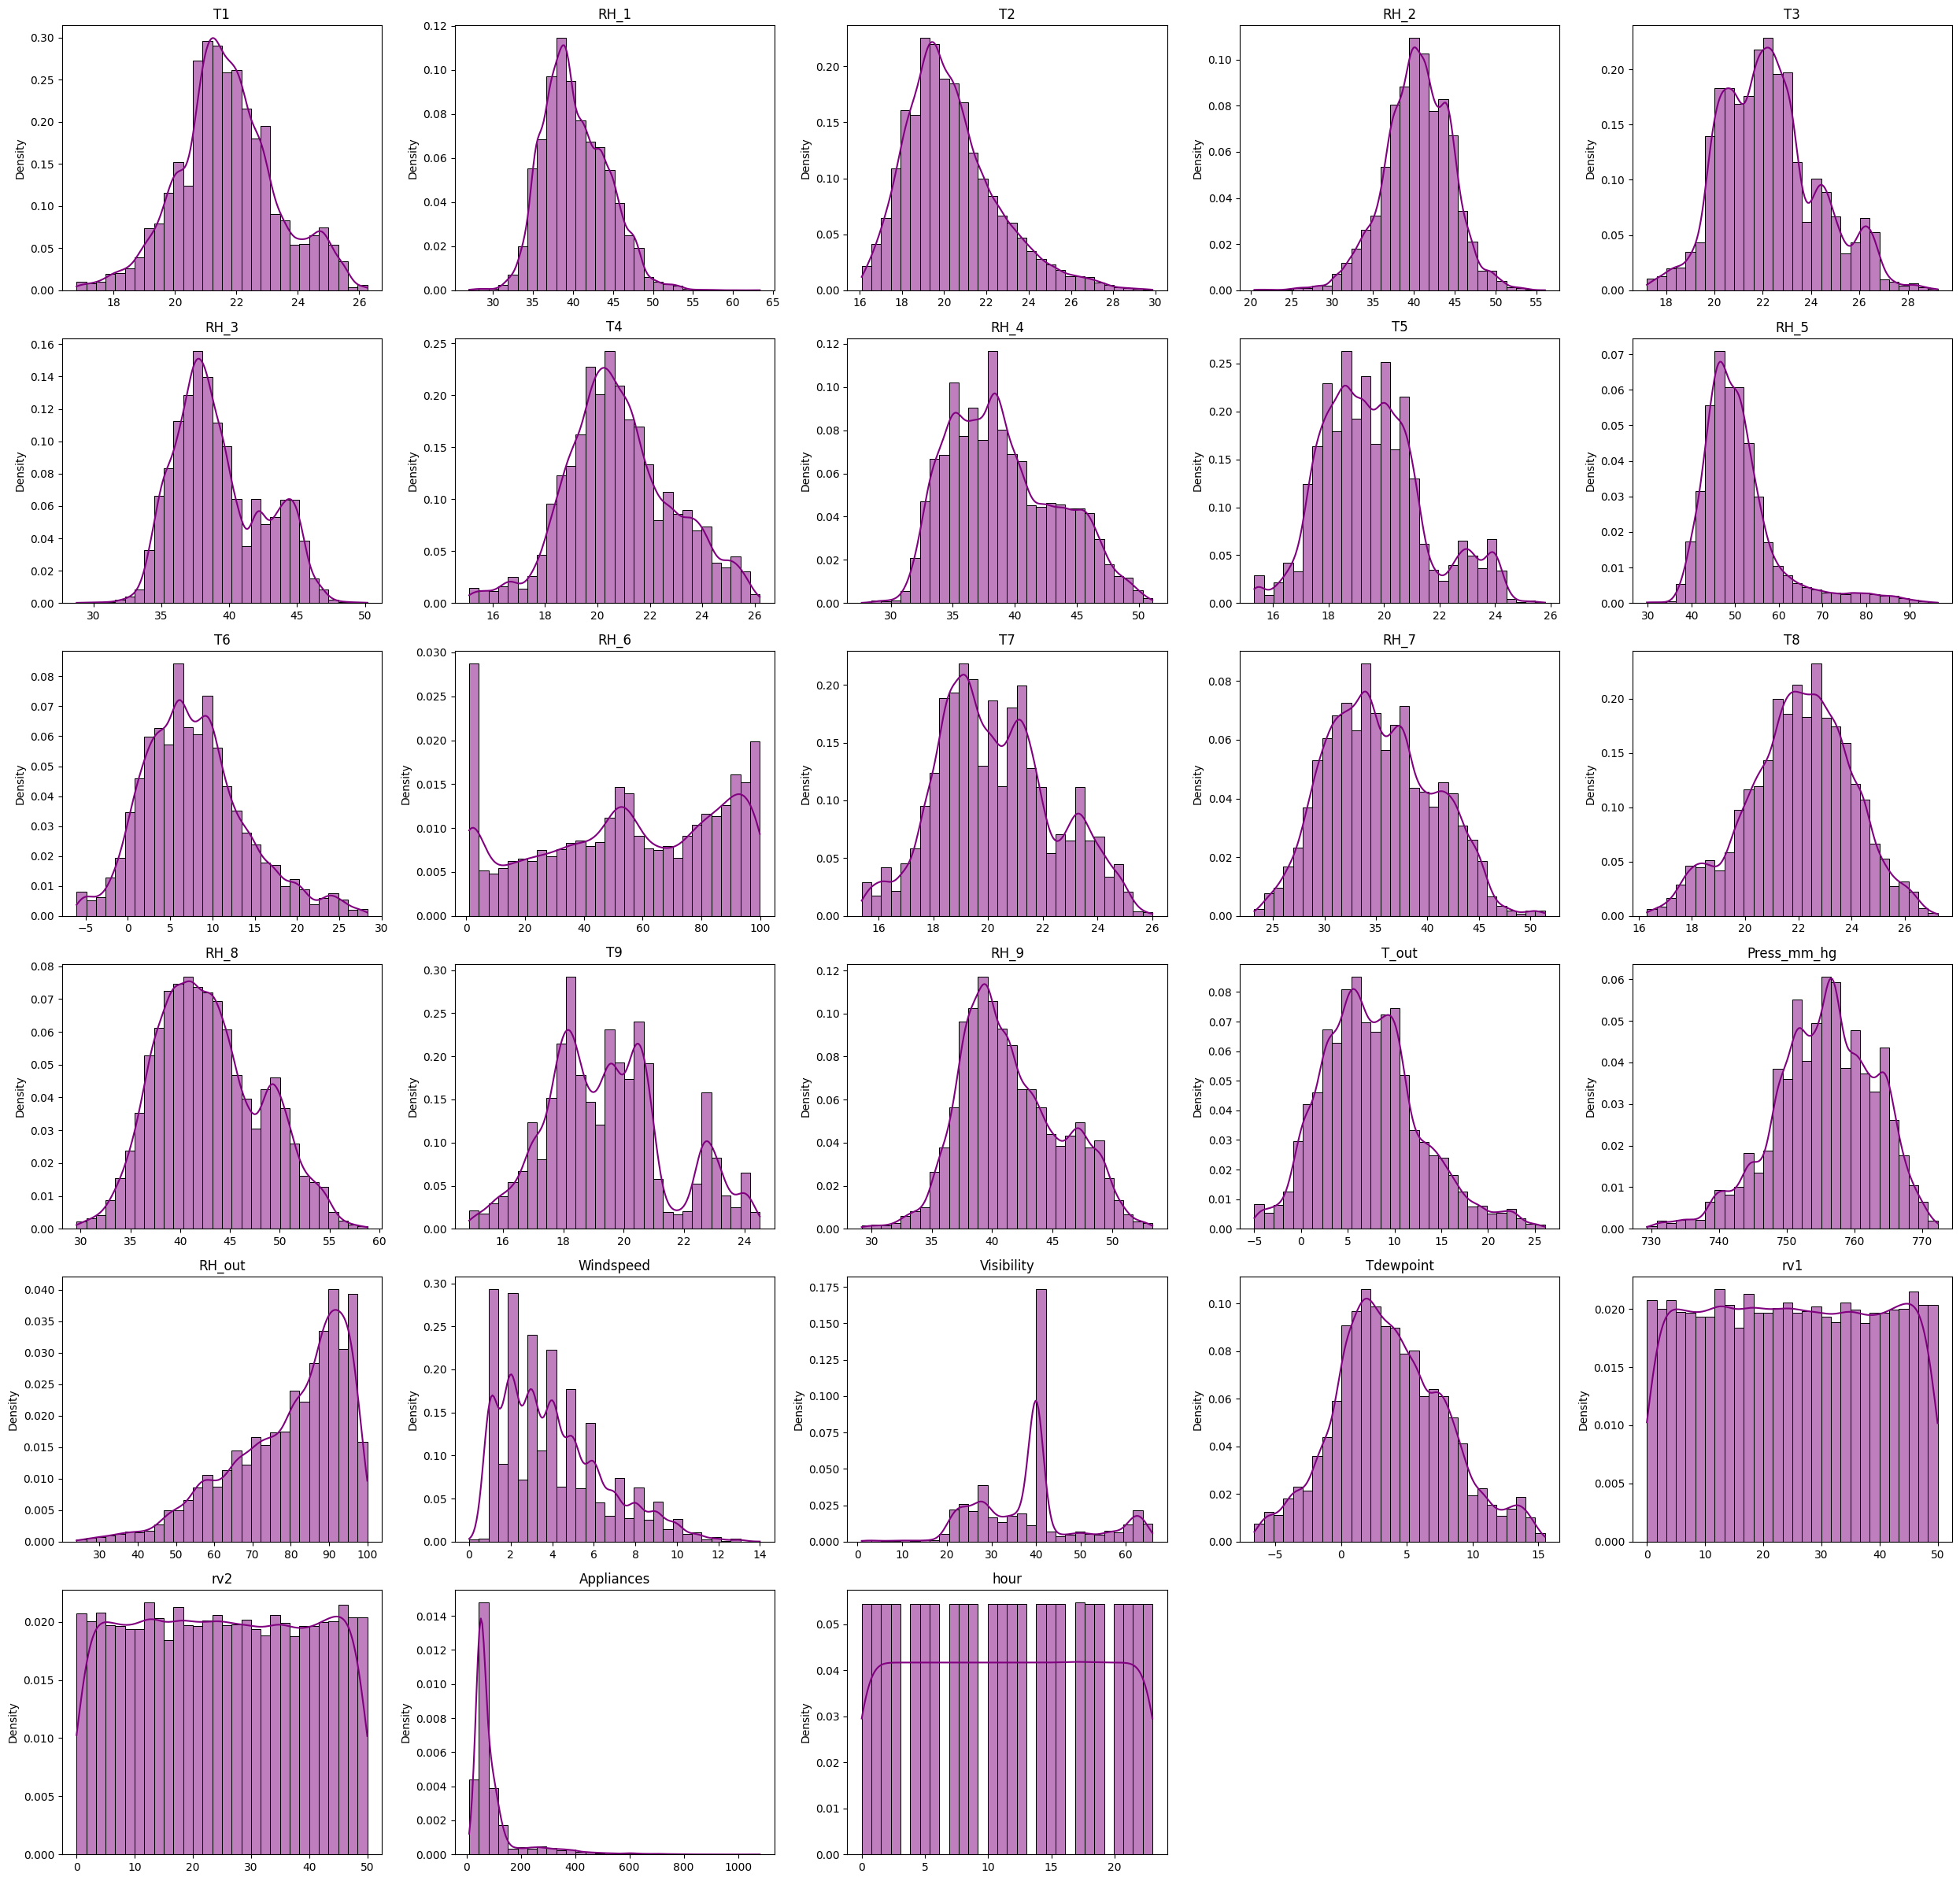

In [108]:
n_cols = 5
n_rows = math.ceil(len(numerical_features.columns) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, column in enumerate(numerical_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(numerical_features[column], kde=True, color='purple', stat='density', bins=30)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("Density")
    
plt.tight_layout()
plt.show()


## Plot scatter to find out the pattern of correlation dependent variable 

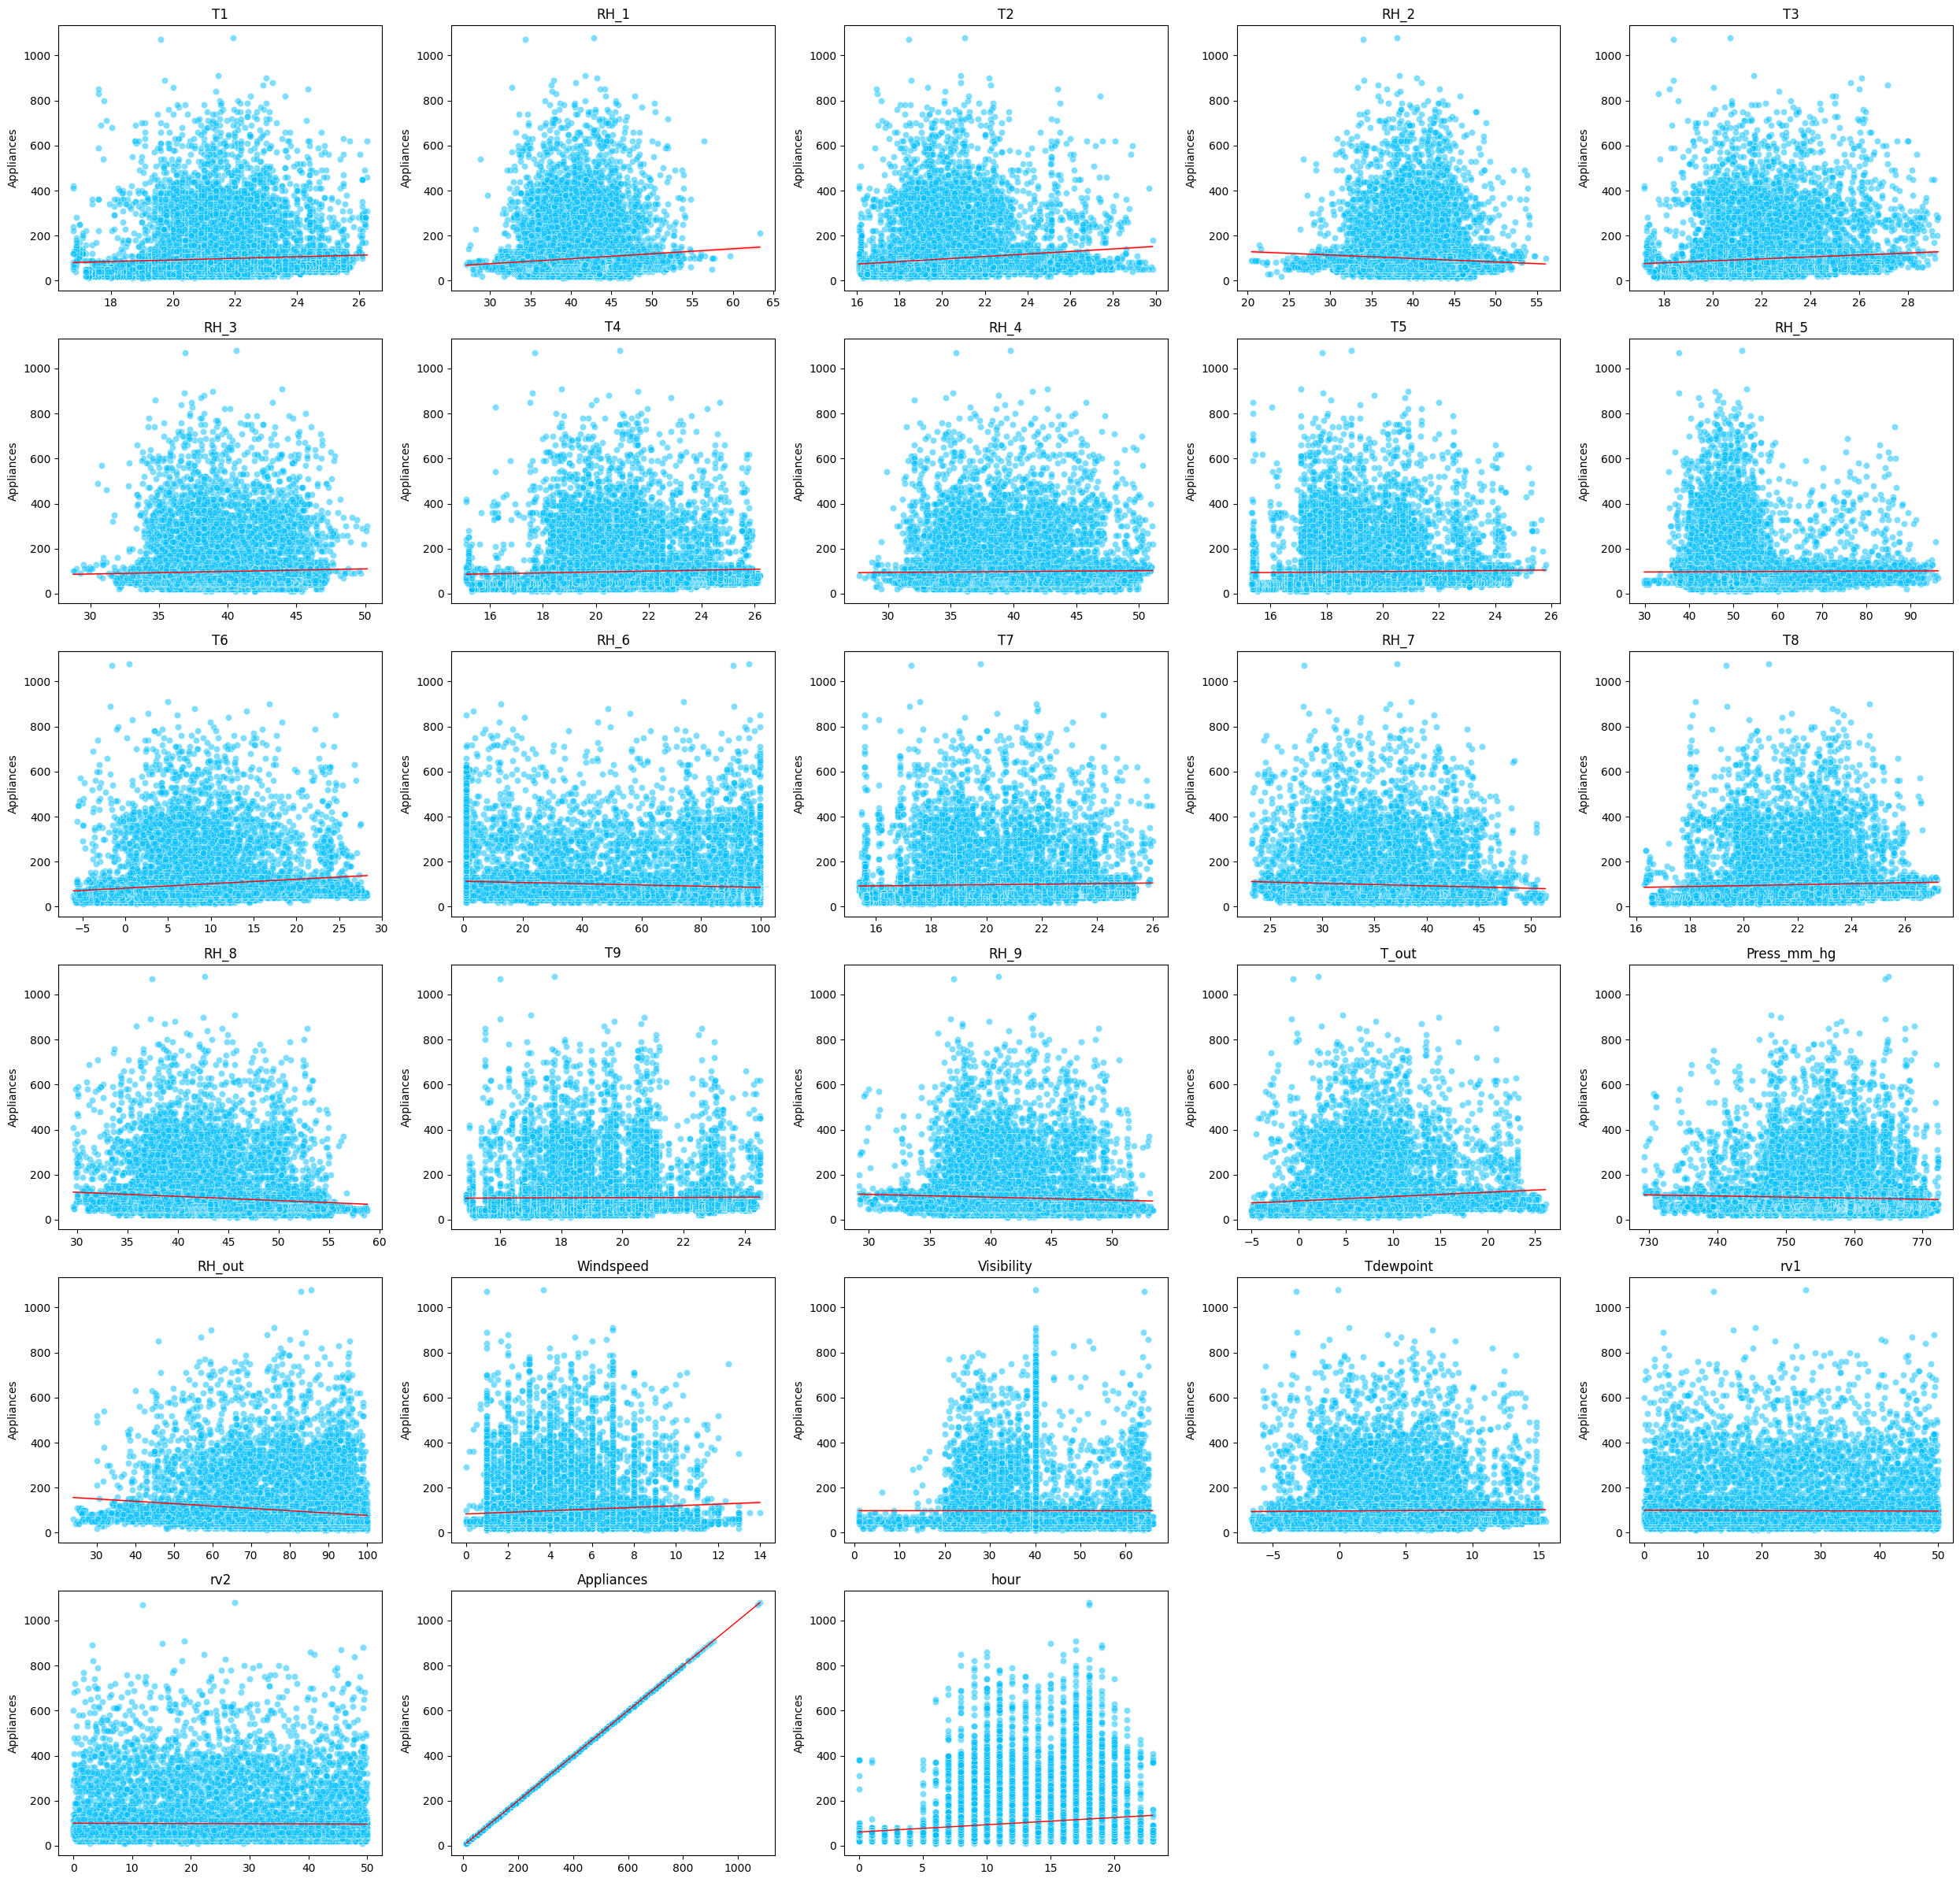

In [109]:
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, column in enumerate(numerical_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=numerical_features[column], y=dependent_variable, color='deepskyblue', alpha=0.5)
    sns.regplot(x=numerical_features[column], y=dependent_variable, scatter=False, color='red', line_kws={'linewidth': 1})
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("Appliances")
    
plt.tight_layout()
plt.show()


#### Quantile-Quantile (q-q) plot 
- Technique to determine if two data sets come from same populations 

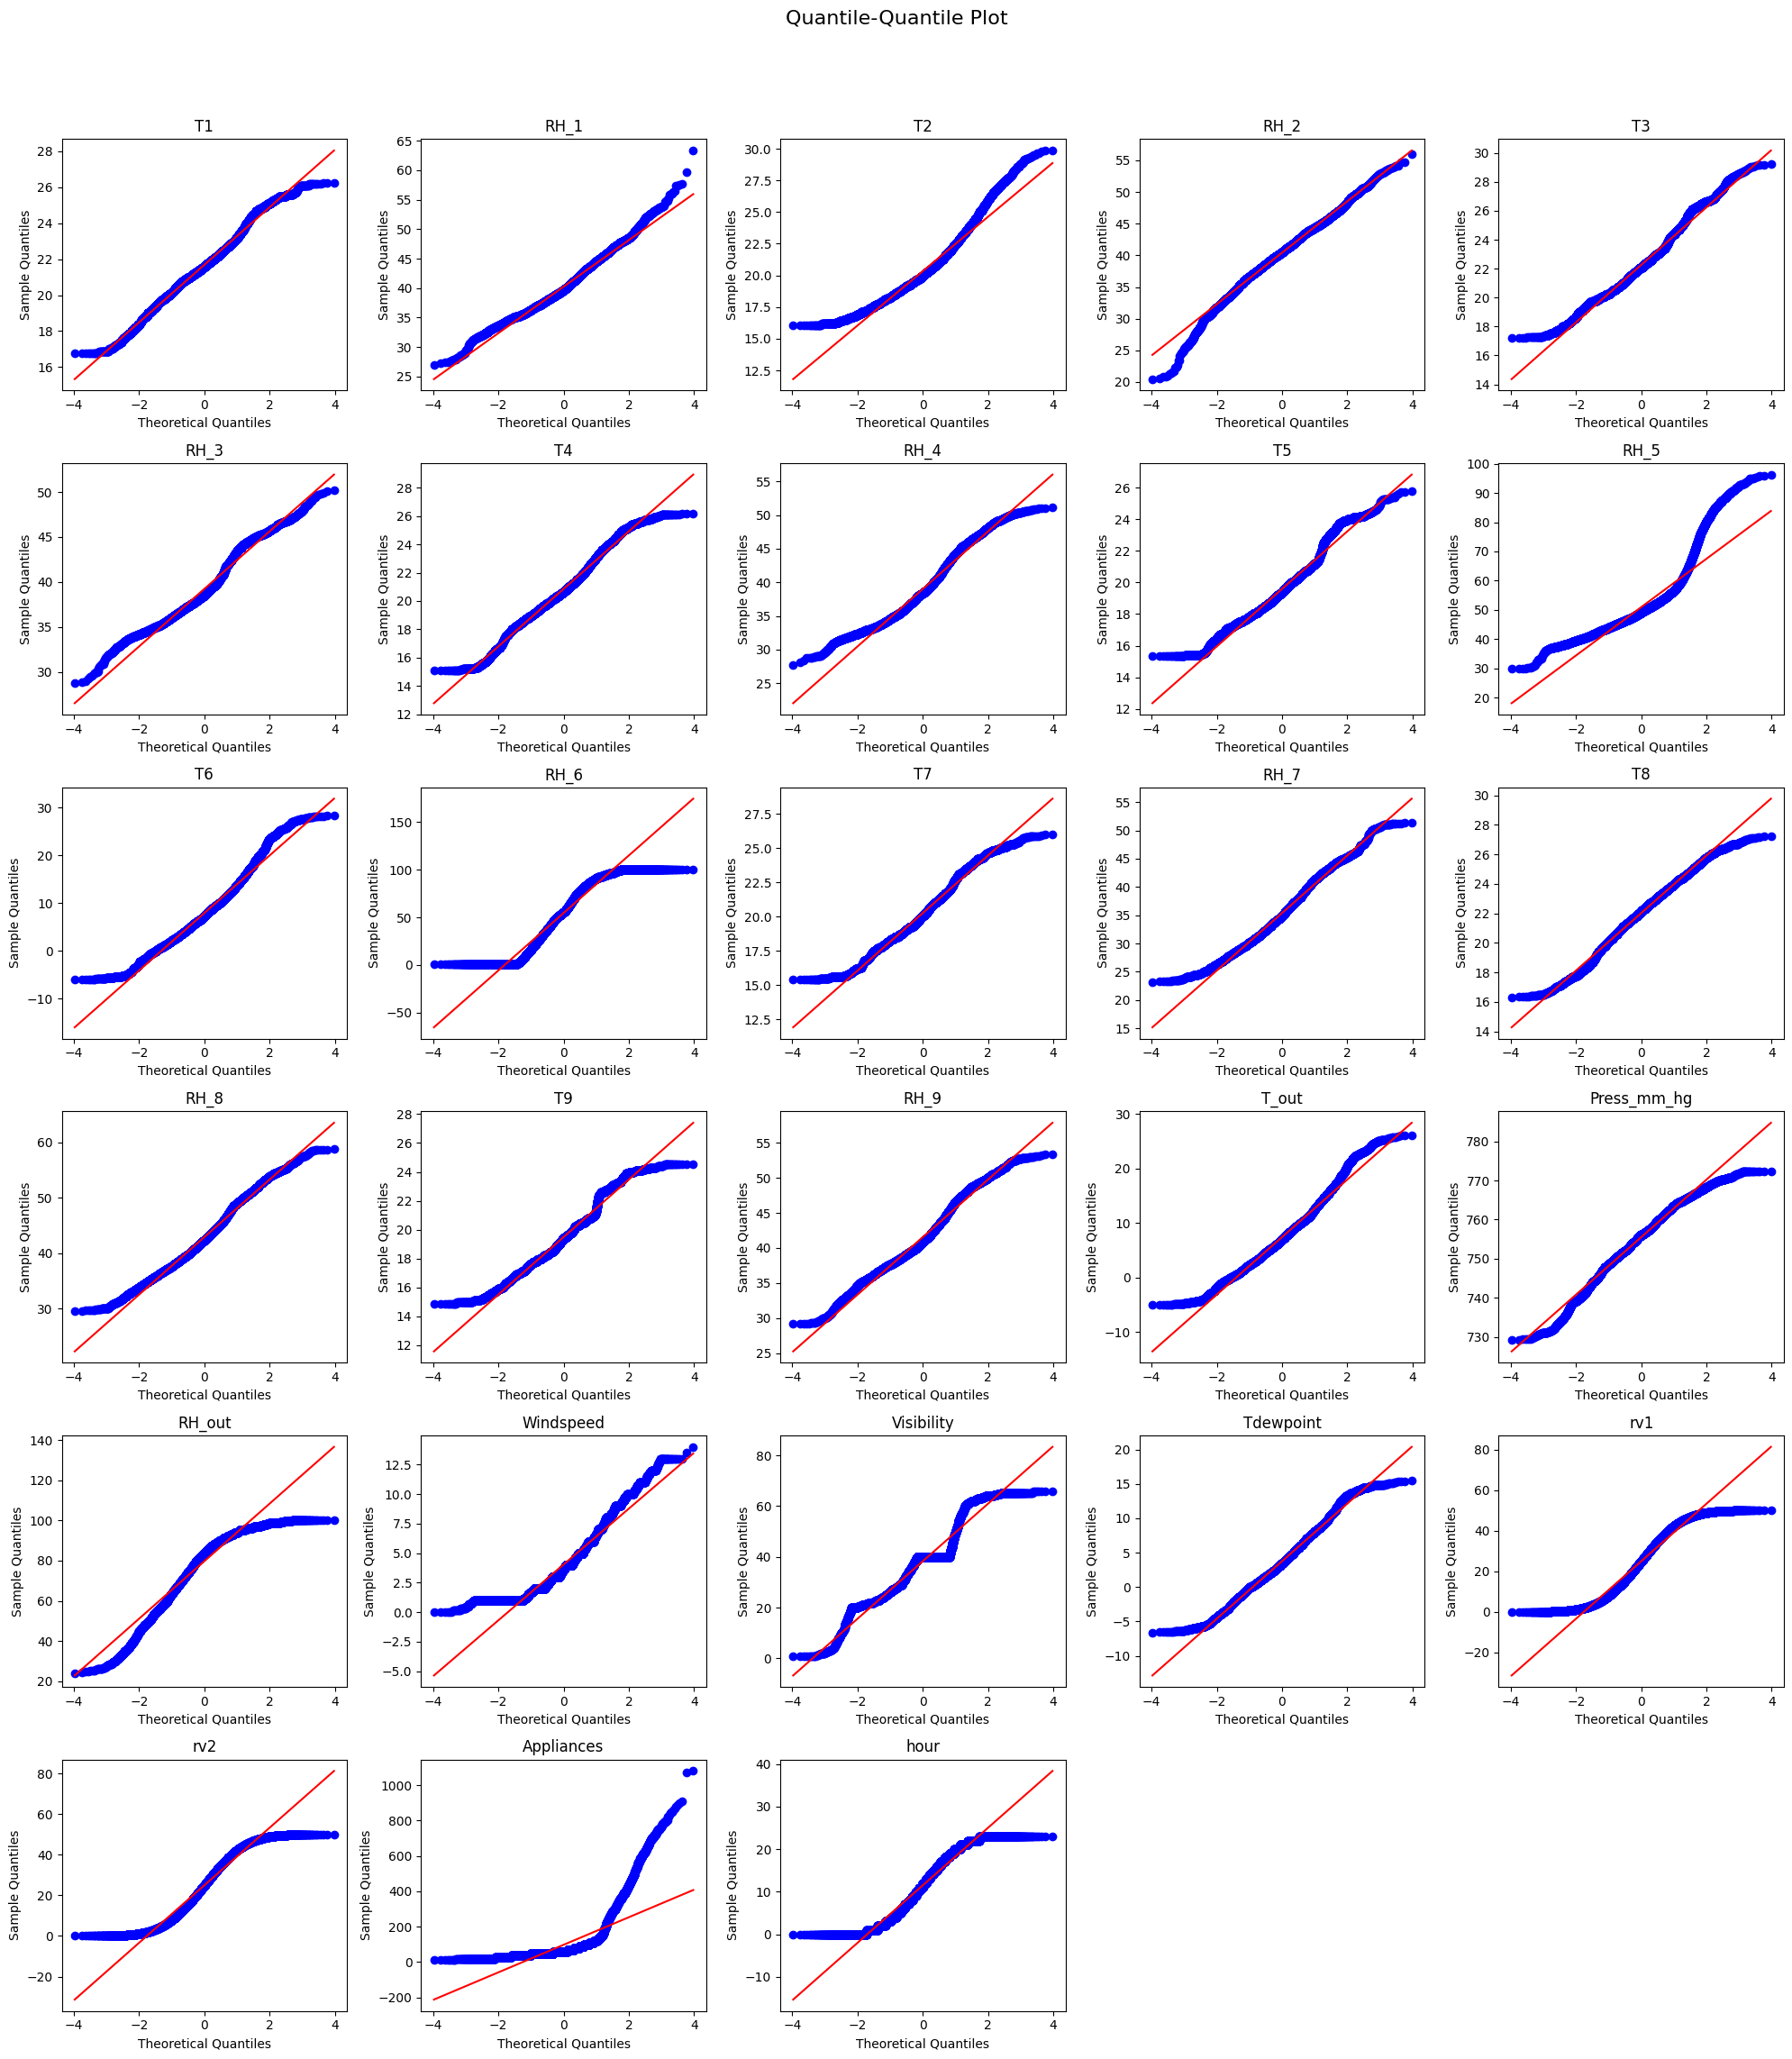

In [110]:
# Quantile-Quantile Plot for Normality Check
plt.figure(figsize=(n_cols * 4, n_rows * 4))
plt.suptitle("Quantile-Quantile Plot", fontsize=16)

# Plot each variable
for i, column in enumerate(numerical_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    stats.probplot(numerical_features[column].dropna(), dist="norm", plot=plt)
    plt.title(column)
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Categorical Variable EDA

In [111]:
categorical.head()

day_name month_name face_of_day
0   Monday    January   Afternoon
1   Monday    January   Afternoon
2   Monday    January   Afternoon
3   Monday    January   Afternoon
4   Monday    January   Afternoon

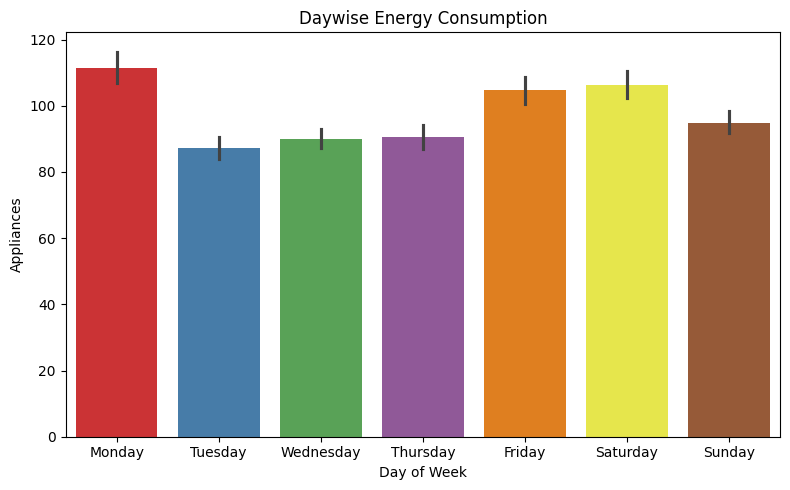

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='day_name', y='Appliances', hue = 'day_name' , legend= False, errorbar='ci', palette='Set1')  # Or try 'Set1'
plt.title("Daywise Energy Consumption")
plt.xlabel("Day of Week")
plt.ylabel("Appliances")
plt.tight_layout()
plt.show()


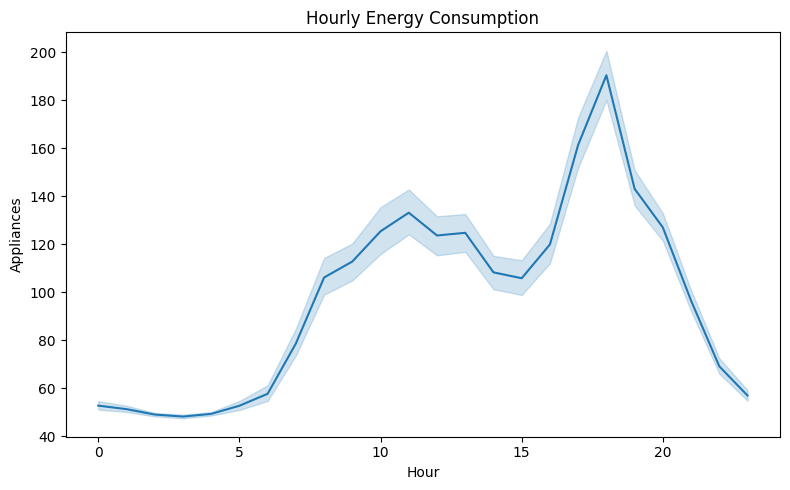

In [113]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=numerical_features, x='hour', y='Appliances', errorbar='ci')
plt.title("Hourly Energy Consumption")
plt.xlabel("Hour")
plt.ylabel("Appliances")
plt.tight_layout()
plt.show()

## Descriptions: 
- Energy consumption increases starting around 5 AM, peaks mid-morning, dips in the afternoon, and rises again in the evening before dropping at night.

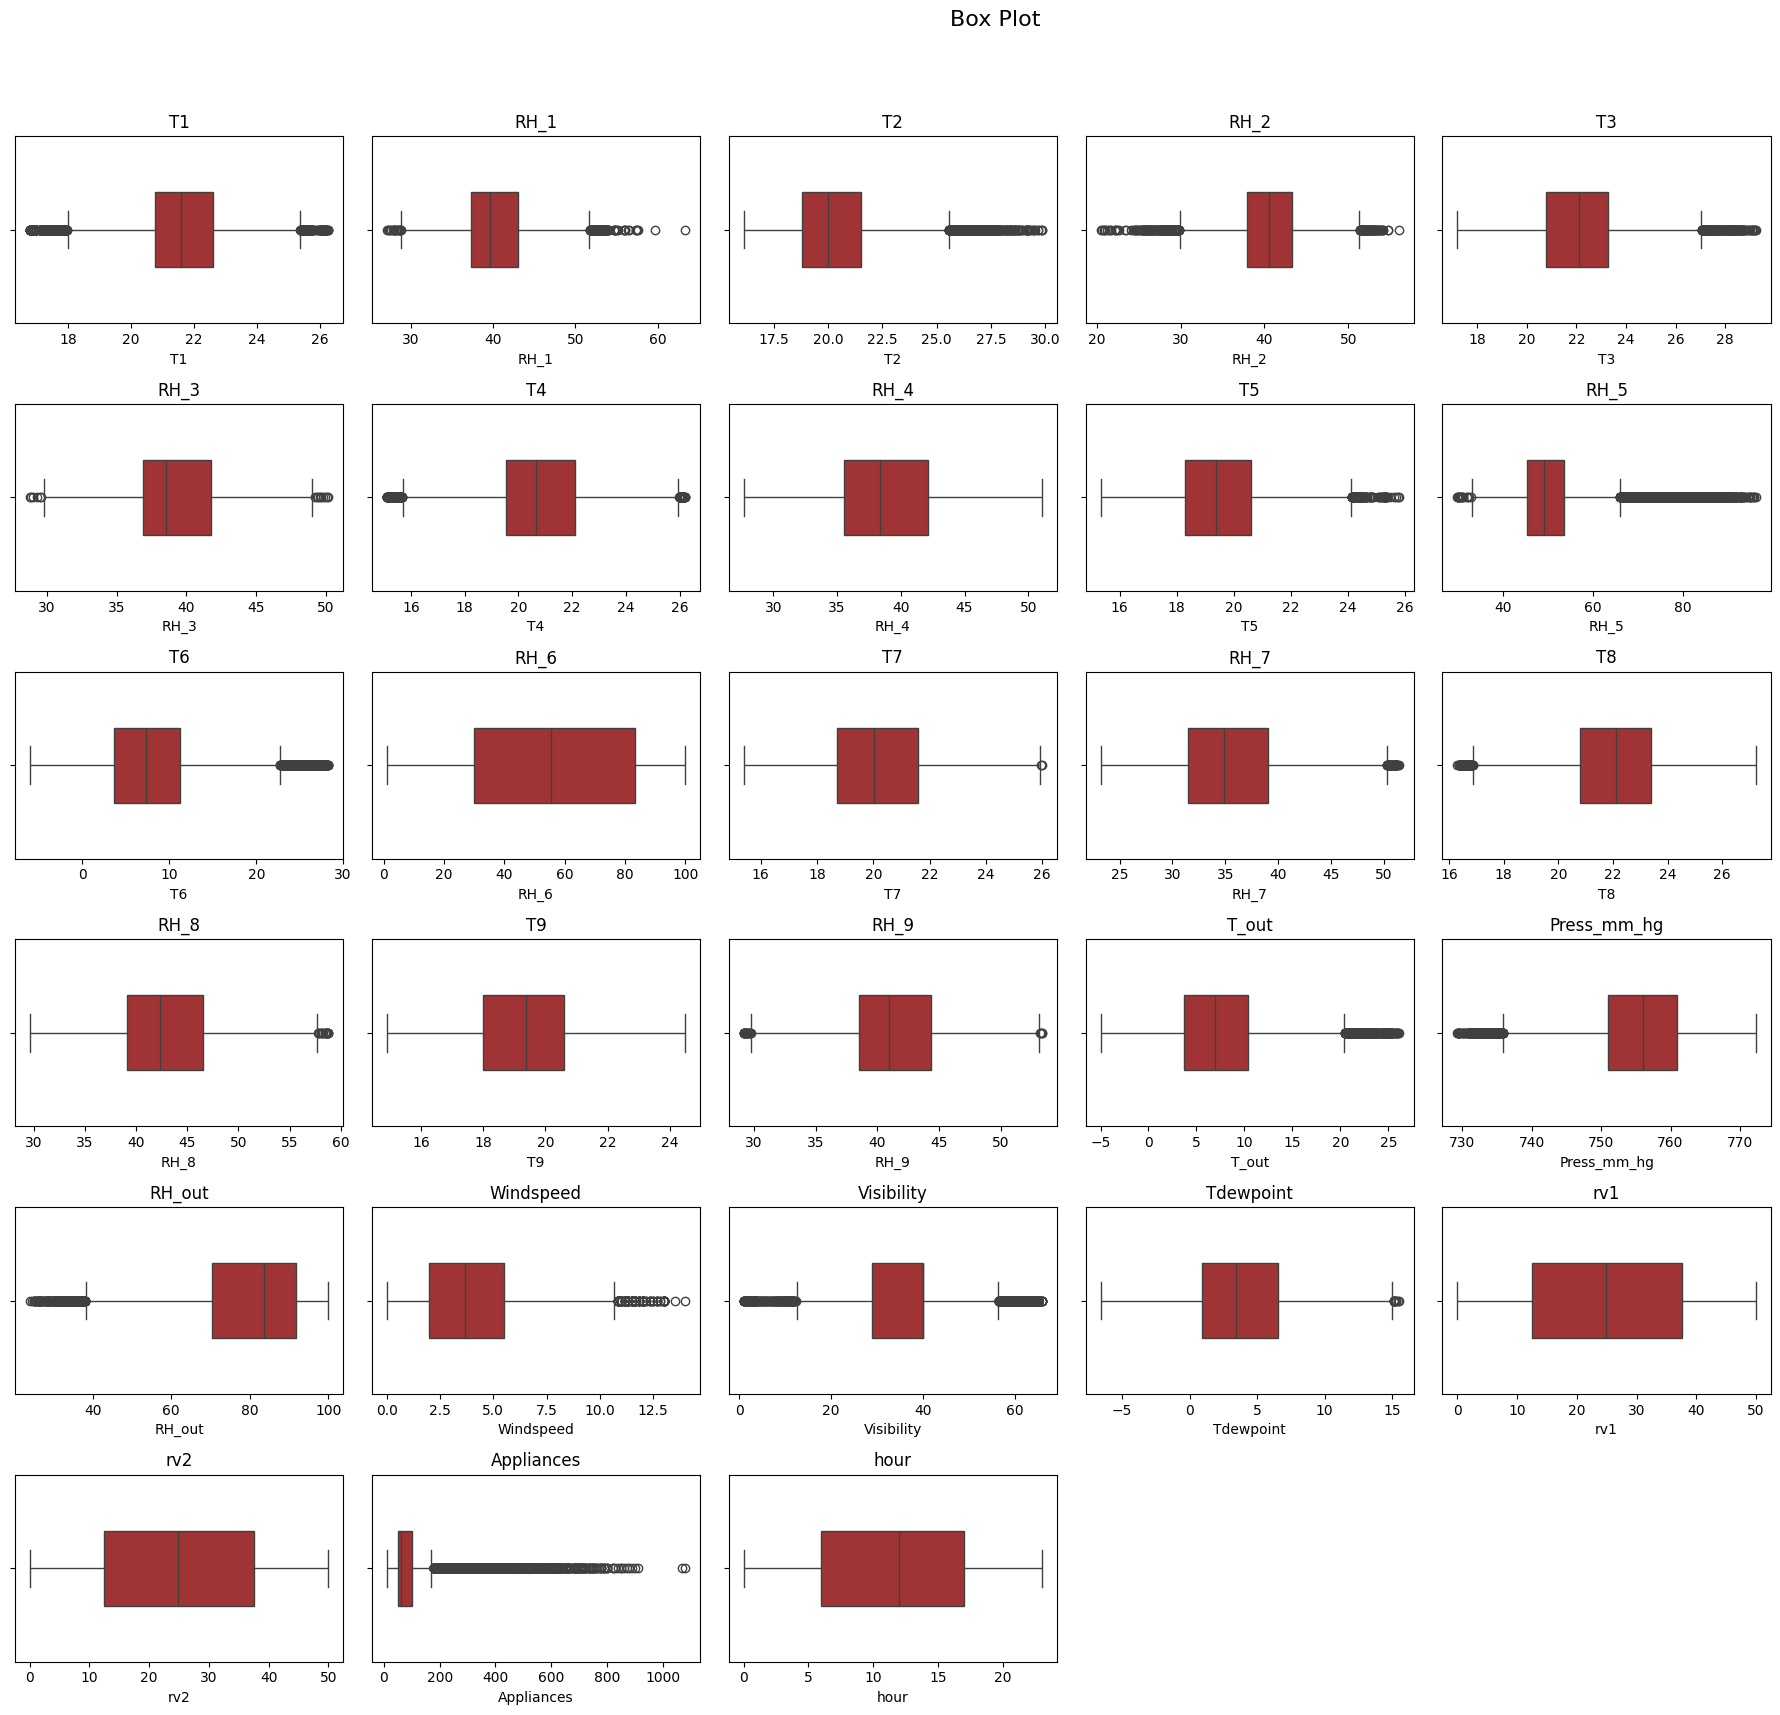

In [114]:
# Box plot 

# Create figure
plt.figure(figsize=(n_cols * 4, n_rows * 3))
plt.suptitle("Box Plot", fontsize=16)

# Plot each boxplot
for i, column in enumerate(numerical_features.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=numerical_features[column], color='firebrick', width=0.4)
    plt.title(column)

plt.tight_layout(rect=[0, 0.03, 0.90, 0.95])
plt.show()


# Step 3: Feature Engineering and Selection 

## Numerical Features 

In [115]:
# Define feature types
numerical_features = [
    'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
    'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
    'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint',
    'rv1', 'rv2', 'hour', 'month'
]

dependent_feature = 'Appliances'

categorical_features = ['day_name', 'face_of_day', 'month_name']

In [116]:
df = df.drop(columns=['date'])


In [117]:
def cap_outliers_IQR(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap outliers
        df_capped[col] = df_capped[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
        
    return df_capped


In [118]:
# Assuming `numerical_features` list is already defined (from previous step)
df = cap_outliers_IQR(df, numerical_features)

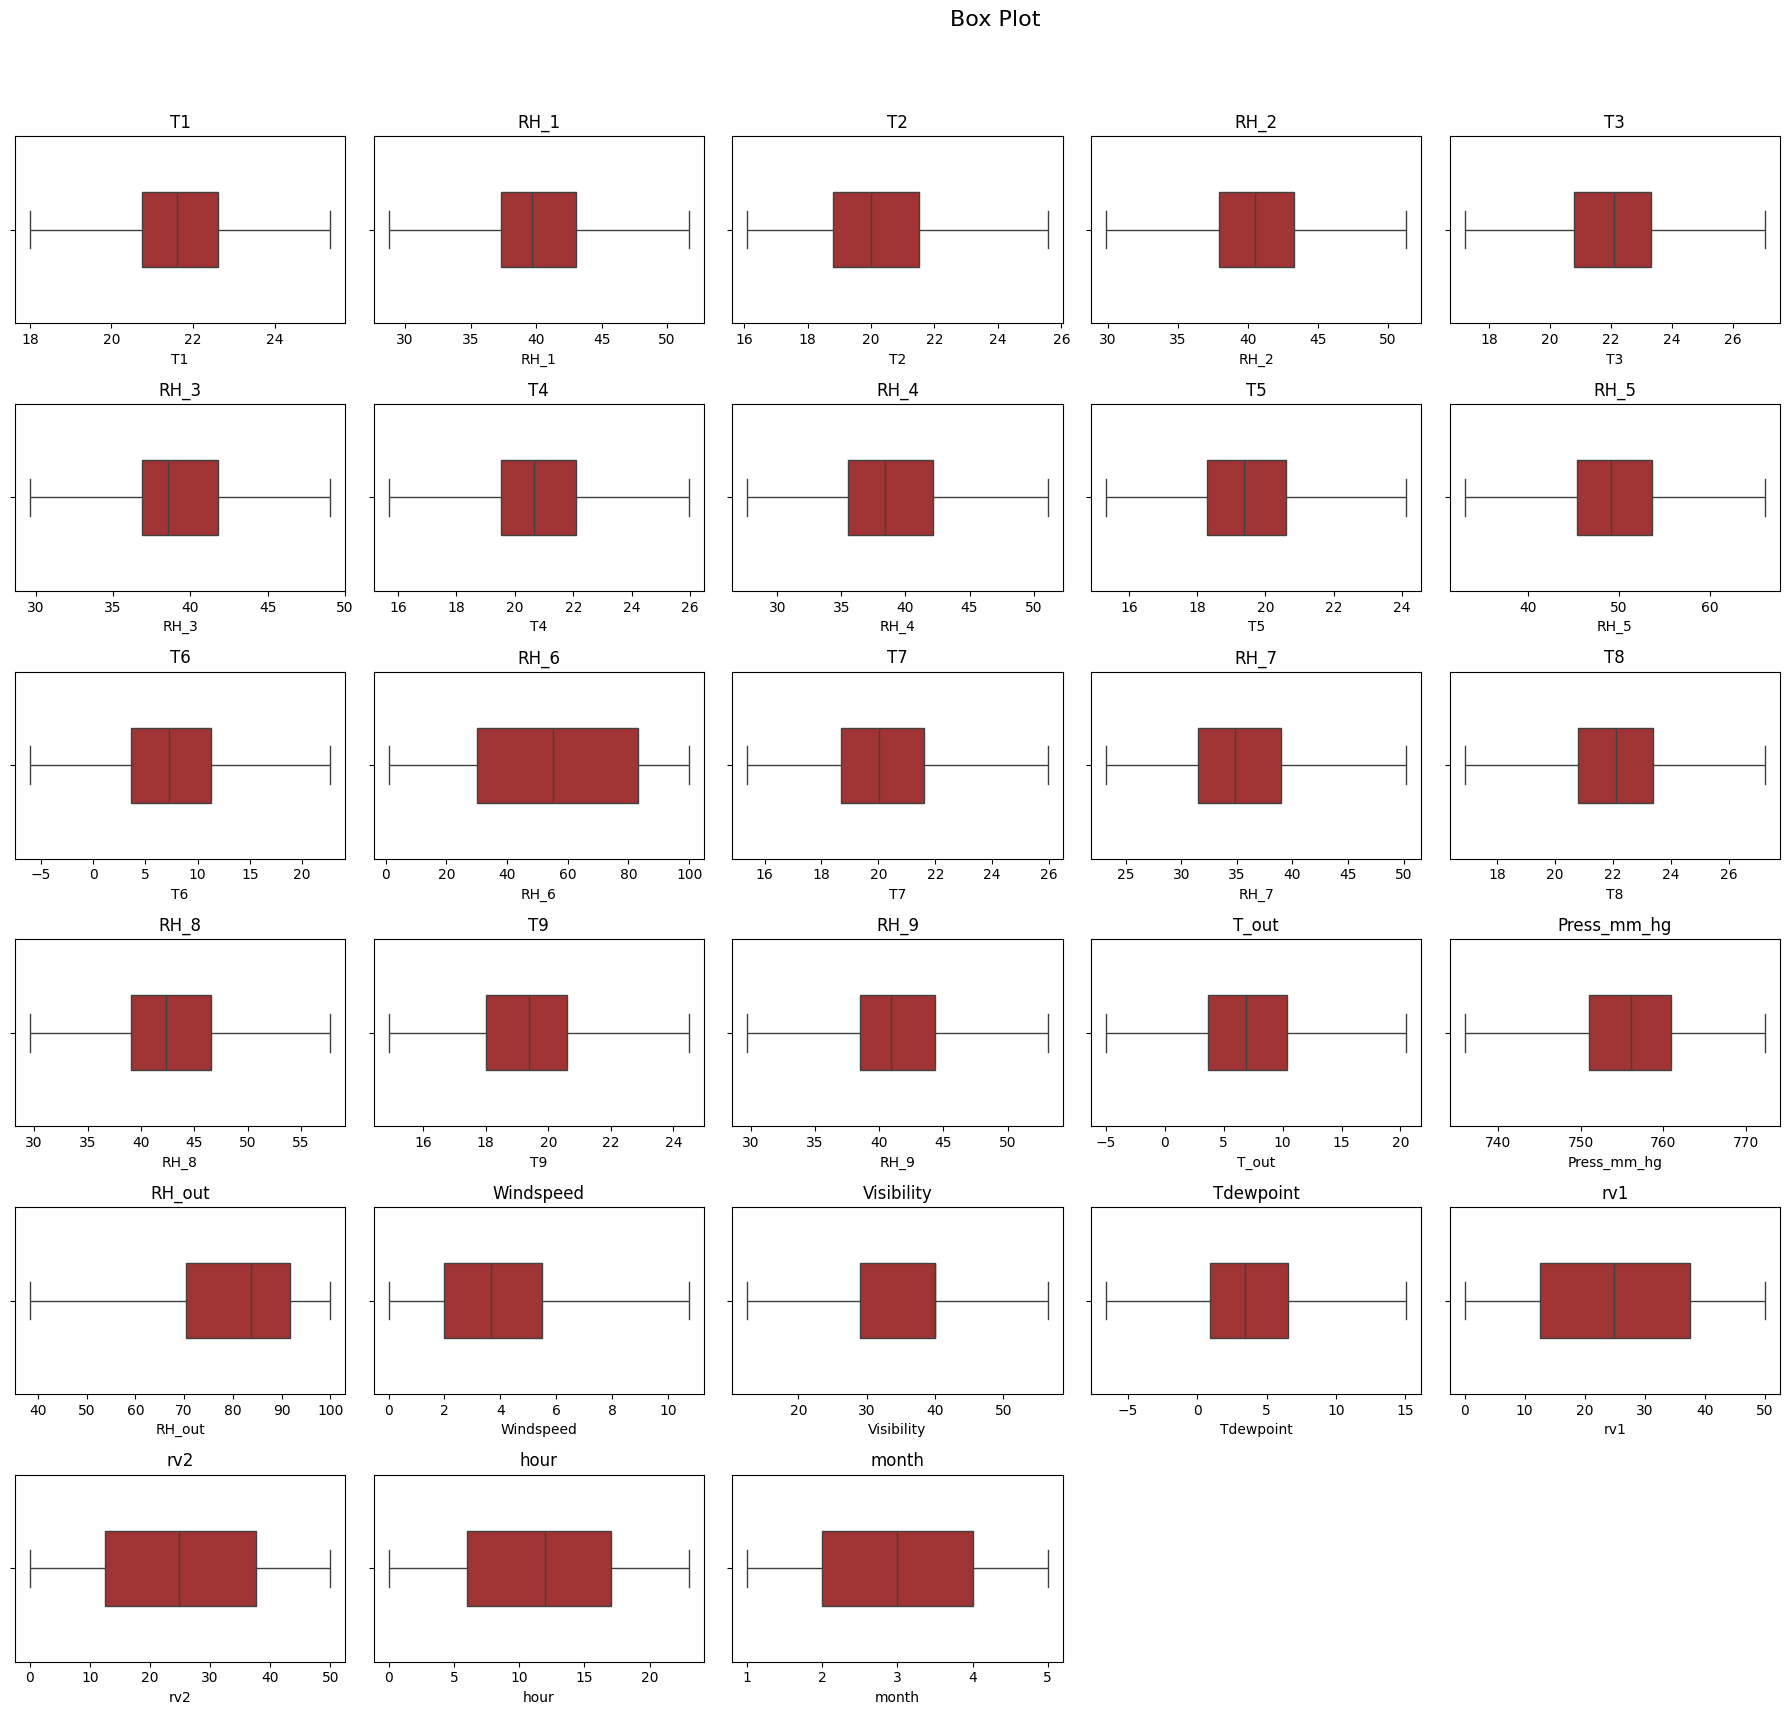

In [119]:

# Get only numerical columns (or specify your own)
columns_to_plot = numerical_features  # or df.select_dtypes(include='number').columns

n_cols = 5
n_rows = math.ceil(len(columns_to_plot) / n_cols)

plt.figure(figsize=(n_cols * 4, n_rows * 3))
plt.suptitle("Box Plot", fontsize=16)

# Plot each boxplot
for i, column in enumerate(columns_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[column], color='firebrick', width=0.4)
    plt.title(column)

plt.tight_layout(rect=[0, 0.03, 0.90, 0.95])
plt.show()

## Encoding Categorical Variables

In [120]:
df.head()

T1       RH_1    T2       RH_2     T3       RH_3         T4       RH_4  \
0  19.89  47.596667  19.2  44.790000  19.79  44.730000  19.000000  45.566667   
1  19.89  46.693333  19.2  44.722500  19.79  44.790000  19.000000  45.992500   
2  19.89  46.300000  19.2  44.626667  19.79  44.933333  18.926667  45.890000   
3  19.89  46.066667  19.2  44.590000  19.79  45.000000  18.890000  45.723333   
4  19.89  46.333333  19.2  44.530000  19.79  45.000000  18.890000  45.530000   

          T5   RH_5  ...        rv1        rv2  Appliances  hour  day  \
0  17.166667  55.20  ...  13.275433  13.275433          60    17   11   
1  17.166667  55.20  ...  18.606195  18.606195          60    17   11   
2  17.166667  55.09  ...  28.642668  28.642668          50    17   11   
3  17.166667  55.09  ...  45.410390  45.410390          50    17   11   
4  17.200000  55.09  ...  10.084097  10.084097          60    17   11   

   day_of_week  day_name  month  month_name  face_of_day  
0            0    Monday      1     January    Afternoon  
1            0    Monday      1     January    Afternoon  
2            0    Monday      1     January    Afternoon  
3            0    Monday      1     January    Afternoon  
4            0    Monday      1     January    Afternoon  

[5 rows x 34 columns]

In [121]:
df_processed= pd.get_dummies(df, columns=categorical_features, drop_first=True)
df_processed.head()

T1       RH_1    T2       RH_2     T3       RH_3         T4       RH_4  \
0  19.89  47.596667  19.2  44.790000  19.79  44.730000  19.000000  45.566667   
1  19.89  46.693333  19.2  44.722500  19.79  44.790000  19.000000  45.992500   
2  19.89  46.300000  19.2  44.626667  19.79  44.933333  18.926667  45.890000   
3  19.89  46.066667  19.2  44.590000  19.79  45.000000  18.890000  45.723333   
4  19.89  46.333333  19.2  44.530000  19.79  45.000000  18.890000  45.530000   

          T5   RH_5  ...  day_name_Thursday  day_name_Tuesday  \
0  17.166667  55.20  ...              False             False   
1  17.166667  55.20  ...              False             False   
2  17.166667  55.09  ...              False             False   
3  17.166667  55.09  ...              False             False   
4  17.200000  55.09  ...              False             False   

   day_name_Wednesday  face_of_day_Evening  face_of_day_Morning  \
0               False                False                False   
1               False                False                False   
2               False                False                False   
3               False                False                False   
4               False                False                False   

   face_of_day_Night  month_name_February  month_name_January  \
0              False                False                True   
1              False                False                True   
2              False                False                True   
3              False                False                True   
4              False                False                True   

   month_name_March  month_name_May  
0             False           False  
1             False           False  
2             False           False  
3             False           False  
4             False           False  

[5 rows x 44 columns]

In [122]:
# convert boolean columns to integers
df_processed = df_processed.astype({col: int for col in df_processed.select_dtypes('bool').columns})


In [123]:
df_processed.head()

T1       RH_1    T2       RH_2     T3       RH_3         T4       RH_4  \
0  19.89  47.596667  19.2  44.790000  19.79  44.730000  19.000000  45.566667   
1  19.89  46.693333  19.2  44.722500  19.79  44.790000  19.000000  45.992500   
2  19.89  46.300000  19.2  44.626667  19.79  44.933333  18.926667  45.890000   
3  19.89  46.066667  19.2  44.590000  19.79  45.000000  18.890000  45.723333   
4  19.89  46.333333  19.2  44.530000  19.79  45.000000  18.890000  45.530000   

          T5   RH_5  ...  day_name_Thursday  day_name_Tuesday  \
0  17.166667  55.20  ...                  0                 0   
1  17.166667  55.20  ...                  0                 0   
2  17.166667  55.09  ...                  0                 0   
3  17.166667  55.09  ...                  0                 0   
4  17.200000  55.09  ...                  0                 0   

   day_name_Wednesday  face_of_day_Evening  face_of_day_Morning  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   face_of_day_Night  month_name_February  month_name_January  \
0                  0                    0                   1   
1                  0                    0                   1   
2                  0                    0                   1   
3                  0                    0                   1   
4                  0                    0                   1   

   month_name_March  month_name_May  
0                 0               0  
1                 0               0  
2                 0               0  
3                 0               0  
4                 0               0  

[5 rows x 44 columns]

#### Checking the Multicollinearity Variables 

In [136]:
X_numeric = df.select_dtypes(include=['number'])

In [158]:
X_numeric.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'Appliances', 'hour', 'day', 'day_of_week', 'month'],
      dtype='object')

In [159]:
X = X_numeric.drop(columns=[dependent_feature], errors='ignore')
X = add_constant(X)  # Add constant term for intercept
y = df_processed[dependent_feature]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

/Users/abdoulabdillahi/miniconda3/envs/env-statistic/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [139]:
X.columns

Index(['const', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'hour', 'day', 'day_of_week', 'month'],
      dtype='object')

In [140]:
vif_data

feature           VIF
0         const  2.042500e+04
1            T1  1.993344e+01
2          RH_1  1.490550e+01
3            T2  2.428198e+01
4          RH_2  1.648199e+01
5            T3  1.096142e+01
6          RH_3  1.131254e+01
7            T4  9.313006e+00
8          RH_4  1.767908e+01
9            T5  1.022065e+01
10         RH_5  1.487106e+00
11           T6  3.348310e+01
12         RH_6  1.285741e+01
13           T7  1.801409e+01
14         RH_7  1.091705e+01
15           T8  8.179907e+00
16         RH_8  9.384034e+00
17           T9  3.165273e+01
18         RH_9  7.419431e+00
19        T_out  1.486577e+02
20  Press_mm_hg  1.468987e+00
21       RH_out  4.700262e+01
22    Windspeed  1.606795e+00
23   Visibility  1.041122e+00
24    Tdewpoint  8.368376e+01
25          rv1           inf
26          rv2           inf
27         hour  2.097243e+00
28          day  1.580811e+00
29  day_of_week  1.105781e+00
30        month  1.667860e+01

In [126]:

# # Step 2: Filter out features with VIF > 10
# features_to_keep = vif_data[vif_data['VIF'] <= 10]['feature'].tolist()

# # Drop 'const' manually if you're not using it in modeling
# features_to_keep = [f for f in features_to_keep if f != 'const']

# # Step 3: Create a filtered version of your dataset
# X_filtered = X[features_to_keep]

In [141]:
# Compute F-values and p-values
f_values, p_values = f_regression(X, y)

# Organize into a DataFrame
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F_value': f_values,
    'p_value': p_values
}).sort_values(by='F_value', ascending=False)

In [142]:
anova_results

Feature     F_value        p_value
27         hour  973.160402  1.394061e-208
21       RH_out  483.983770  5.448487e-106
3            T2  287.914174   4.035461e-64
11           T6  281.532183   9.479339e-63
19        T_out  198.658504   6.767797e-45
16         RH_8  175.961097   5.477802e-40
22    Windspeed  154.658856   2.256102e-35
2          RH_1  144.281411   4.023694e-33
12         RH_6  137.474160   1.209481e-31
5            T3  131.055669   2.999857e-30
4          RH_2   78.256299   9.797591e-19
14         RH_7   61.168669   5.501088e-15
1            T1   59.856107   1.069419e-14
18         RH_9   52.314385   4.901951e-13
7            T4   32.528871   1.191149e-08
15           T8   31.138626   2.433985e-08
6          RH_3   25.872950   3.679837e-07
20  Press_mm_hg   22.712510   1.894789e-06
13           T7   13.141578   2.895409e-04
9            T5    6.842693   8.907234e-03
8          RH_4    5.681303   1.715603e-02
10         RH_5    5.134534   2.346516e-02
24    Tdewpoint    4.659223   3.089919e-02
30        month    2.658305   1.030264e-01
25          rv1    2.451324   1.174418e-01
26          rv2    2.451324   1.174418e-01
17           T9    1.977559   1.596635e-01
23   Visibility    0.418441   5.177236e-01
29  day_of_week    0.184832   6.672580e-01
28          day    0.110449   7.396369e-01
0         const    0.000000   1.000000e+00

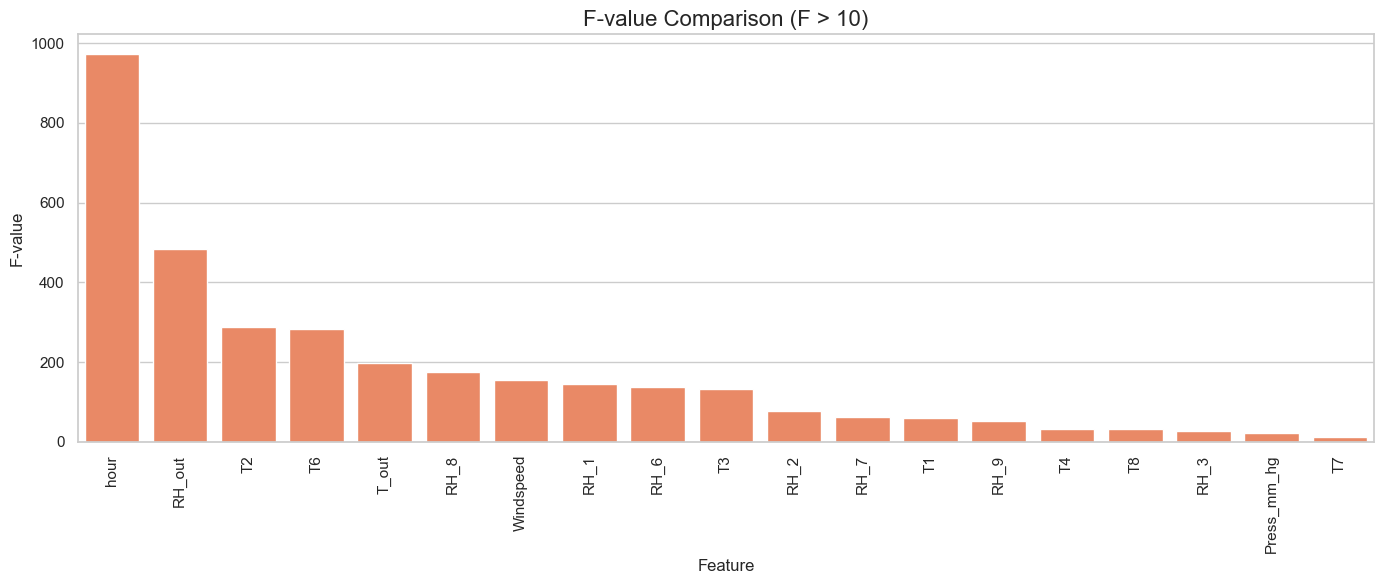

In [153]:
# Set F-value threshold
f_threshold = 10

# Filter features with F-value > threshold and drop 'const' if present
selected_features = anova_results[anova_results['F_value'] > f_threshold]['Feature']
selected_features = selected_features[selected_features != 'const']

# Filter your dataset to keep only those features
X_selected = X[selected_features]

# Optional: Set Seaborn style
sns.set(style="whitegrid")

# Filter anova_results for selected features only
anova_filtered = anova_results[anova_results['Feature'].isin(selected_features)]

# Plot the F-values for selected features
plt.figure(figsize=(14, 6))
sns.barplot(data=anova_filtered, x='Feature', y='F_value', color='coral')

plt.title("F-value Comparison (F > 10)", fontsize=16)
plt.ylabel("F-value")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


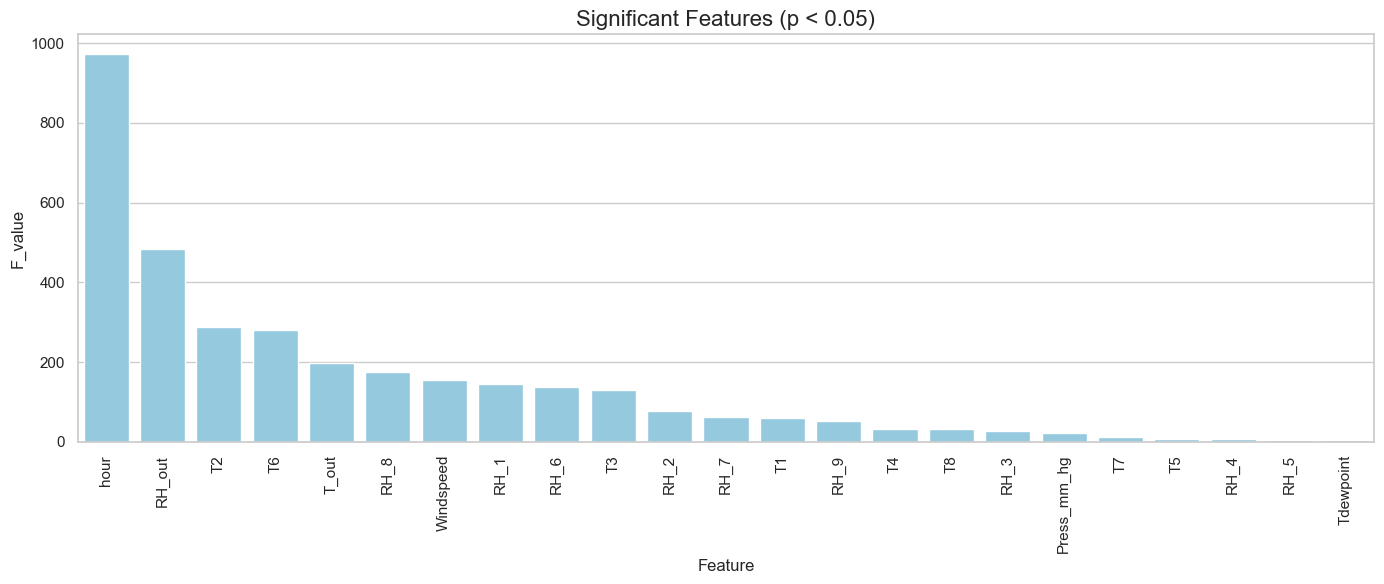

In [144]:
significant_features = anova_results[anova_results['p_value'] < 0.05]

plt.figure(figsize=(14, 6))
sns.barplot(data=significant_features, x='Feature', y='F_value', color='skyblue')

plt.title("Significant Features (p < 0.05)", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Variance Treshold 

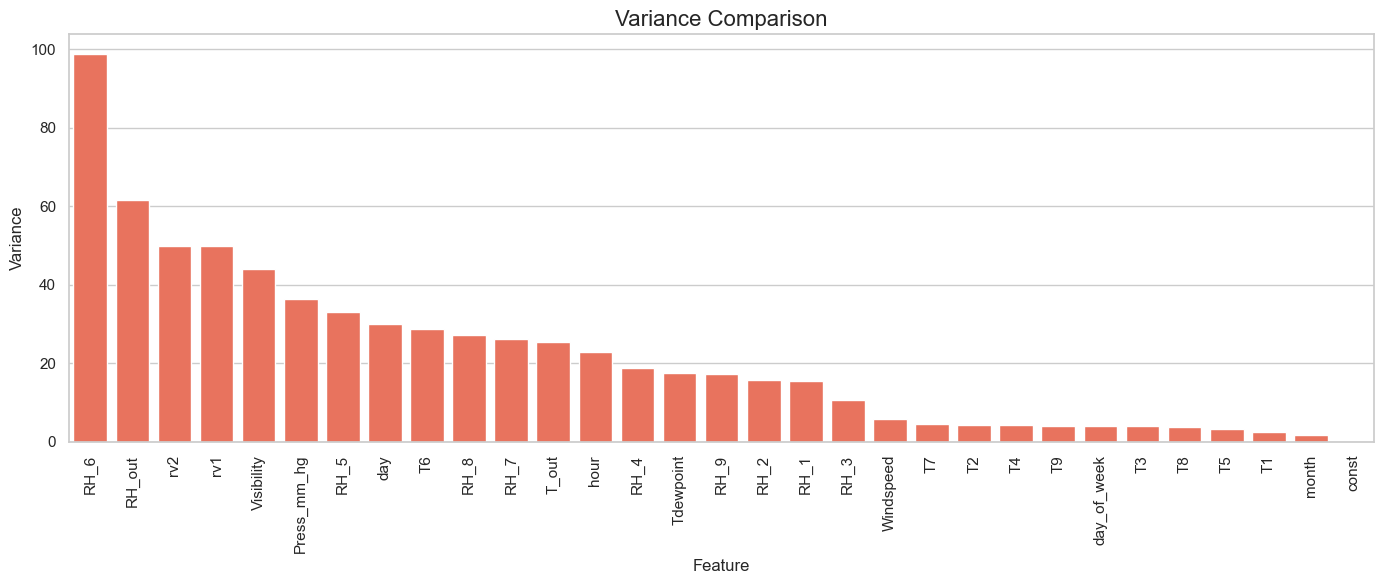

In [160]:
# Assume X is your feature matrix (numeric only)
selector = VarianceThreshold(threshold=0.0)  # 0.0 means keep all non-zero variance features
selector.fit(X)

# Get variances and feature names
variances = selector.variances_
features = X.columns

# Create DataFrame for plotting
variance_df = pd.DataFrame({
    'Feature': features,
    'Variance': variances
}).sort_values(by='Variance', ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=variance_df, x='Feature', y='Variance', color='tomato')
plt.title("Variance Comparison", fontsize=16)
plt.ylabel("Variance")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [162]:
from sklearn.feature_selection import VarianceThreshold, f_regression
import pandas as pd

# Step 1: Variance Thresholding
variance_thresh = 0.01  # You can tune this
var_selector = VarianceThreshold(threshold=variance_thresh)
X_var_filtered = var_selector.fit_transform(X)

# Get feature names that passed variance filtering
var_kept_columns = X.columns[var_selector.get_support()]

# Step 2: Compute F-values on variance-filtered features
X_filtered_df = X[var_kept_columns]
f_values, p_values = f_regression(X_filtered_df, y)

# Step 3: Organize into DataFrame
anova_filtered = pd.DataFrame({
    'Feature': var_kept_columns,
    'F_value': f_values,
    'p_value': p_values
}).sort_values(by='F_value', ascending=False)

# Step 4: Apply F-value threshold (e.g., keep F > 30)
f_thresh = 30
final_features = anova_filtered[anova_filtered['F_value'] > f_thresh]['Feature'].values

# Final selected dataset
X_selected = X[final_features]


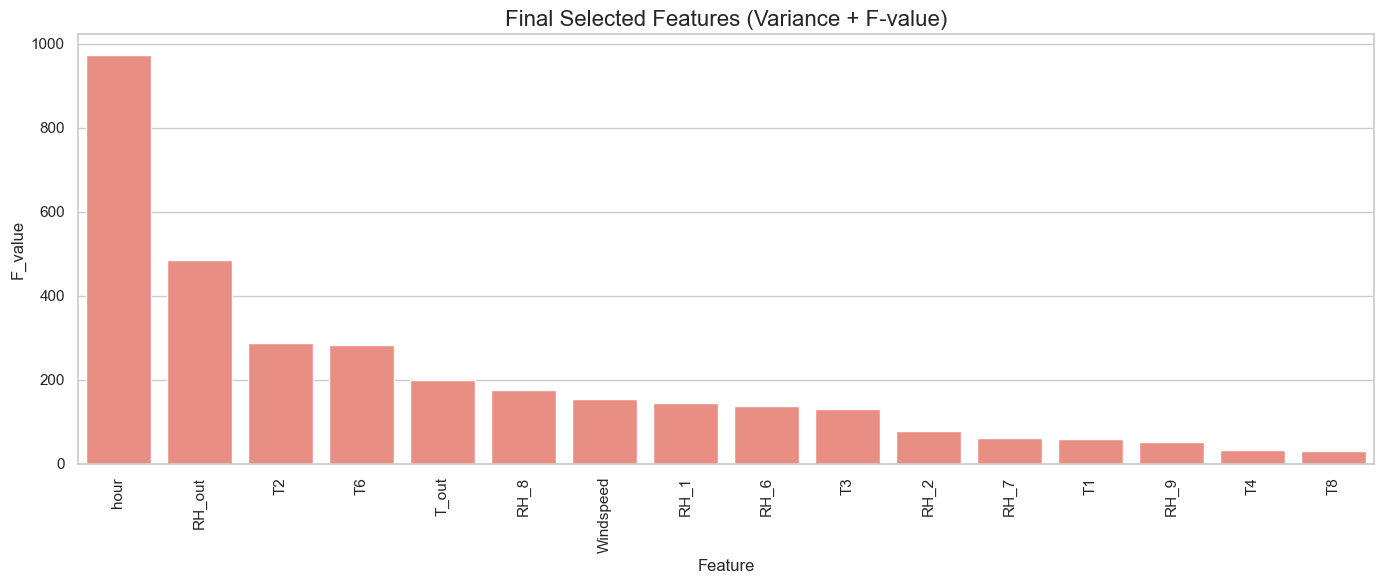

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=anova_filtered[anova_filtered['Feature'].isin(final_features)],
            x='Feature', y='F_value', color='salmon')

plt.title("Final Selected Features (Variance + F-value)", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [164]:
X_selected.head()

hour  RH_out    T2        T6  T_out       RH_8  Windspeed       RH_1  \
0    17    92.0  19.2  7.026667   6.60  48.900000   7.000000  47.596667   
1    17    92.0  19.2  6.833333   6.48  48.863333   6.666667  46.693333   
2    17    92.0  19.2  6.560000   6.37  48.730000   6.333333  46.300000   
3    17    92.0  19.2  6.433333   6.25  48.590000   6.000000  46.066667   
4    17    92.0  19.2  6.366667   6.13  48.590000   5.666667  46.333333   

        RH_6     T3       RH_2       RH_7     T1   RH_9         T4    T8  
0  84.256667  19.79  44.790000  41.626667  19.89  45.53  19.000000  18.2  
1  84.063333  19.79  44.722500  41.560000  19.89  45.56  19.000000  18.2  
2  83.156667  19.79  44.626667  41.433333  19.89  45.50  18.926667  18.2  
3  83.423333  19.79  44.590000  41.290000  19.89  45.40  18.890000  18.1  
4  84.893333  19.79  44.530000  41.230000  19.89  45.40  18.890000  18.1